In [70]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

In [61]:
t_df = pd.DataFrame()
for fl in os.listdir("./../../data/composite_vars"):
    df = pd.read_csv(f"./../../data/composite_vars/{fl}")
    if fl not in ["INF.csv", "PR.csv", "NIM.csv"]:
        df = df.rename(columns={f"{df.columns[1]}":fl[:-4]})
        if t_df.empty:
            t_df = df
        else:
            t_df = pd.merge(t_df, df, on='date')
    else:
        if fl != "NIM.csv":
            t_df[fl[:-4]] = df[fl[:-4]]

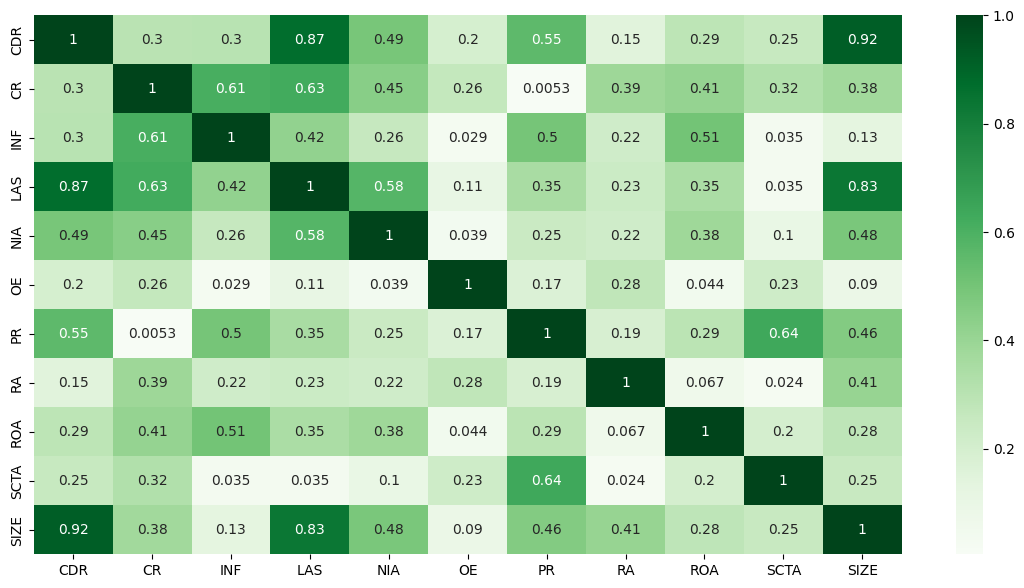

In [62]:
corr_df = t_df.drop('date', axis=1)
corr_matrix = abs(corr_df.corr())
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.show()

Serial correlation tests

In [98]:
ser_corr_res = {"Variable":[], "Statistic":[], "P-value":[]}
lags = 1
for col in corr_df.columns:
    results = acorr_ljungbox(corr_df[col], lags = lags)
    ser_corr_res["Variable"].append(col)
    ser_corr_res["Statistic"].append(results["lb_stat"][lags])
    ser_corr_res["P-value"].append(results["lb_pvalue"][lags])

pd.DataFrame(ser_corr_res)

,Variable,Statistic,P-value
0,CDR,54.973032,1.221950e-13
1,CR,58.466942,2.067357e-14
2,INF,59.114581,1.487529e-14
3,LAS,48.019317,4.220407e-12
4,NIA,8.169949,4.259012e-03
5,OE,0.203434,6.519628e-01
6,PR,57.051699,4.245044e-14
7,RA,29.036004,7.104553e-08
8,ROA,12.670658,3.714387e-04
9,SCTA,26.886146,2.158003e-07
